# Mushroom exploration

In this project, I tried to analyse a dataset of mushrooms using various histograms and built a machine learning model to classify mushrooms.
Data source: [UCI](https://archive.ics.uci.edu/dataset/73/mushroom)

## About the dataset

This dataset contains descriptions of hypothetical specimens corresponding to 23 species of gill fungi of the genera Agaricus and Lepiota, taken from the Audubon Society's Field Guide to North American Fungi (1981). Each species is defined as definitely edible, definitely poisonous, or unknown and not recommended for consumption. The latter class was combined with the poisonous ones. The guidebook makes it clear that there is no simple rule for determining the edibility of a mushroom; there is no "three leaves, let it be" rule for poison oak and ivy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("mushroom_data.csv")

## Examining data

Now, let's calculate the amount of missed data 

In [2]:
df.isnull().sum()

Class                       0
Cap Shape                   0
Cap Surface                 0
Cap Color                   0
Bruises                     0
Odor                        0
Gill Attachment             0
Gill Spacing                0
Gill Size                   0
Gill Color                  0
Stalk Shape                 0
Stalk Root                  0
Stalk Surface Above Ring    0
Stalk Surface Below Ring    0
Stalk Color Above Ring      0
Stalk Color Below Ring      0
Veil Type                   0
Veil Color                  0
Ring Number                 0
Ring Type                   0
Spore Print Color           0
Population                  0
Habitat                     0
dtype: int64

As we can see, all the data is in place. Let's take a preliminary look at the data

In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Class                     8124 non-null   object
 1   Cap Shape                 8124 non-null   object
 2   Cap Surface               8124 non-null   object
 3   Cap Color                 8124 non-null   object
 4   Bruises                   8124 non-null   bool  
 5   Odor                      8124 non-null   object
 6   Gill Attachment           8124 non-null   object
 7   Gill Spacing              8124 non-null   object
 8   Gill Size                 8124 non-null   object
 9   Gill Color                8124 non-null   object
 10  Stalk Shape               8124 non-null   object
 11  Stalk Root                8124 non-null   object
 12  Stalk Surface Above Ring  8124 non-null   object
 13  Stalk Surface Below Ring  8124 non-null   object
 14  Stalk Color Above Ring  

In [5]:
df.describe()

,Class,Cap Shape,Cap Surface,Cap Color,Bruises,Odor,Gill Attachment,Gill Spacing,Gill Size,Gill Color,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Ring Number,Ring Type,Spore Print Color,Population,Habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,Edible,Convex,Scaly,Brown,False,None,Free,Close,Broad,Buff,...,Smooth,White,White,Partial,White,One,Pendant,White,Several,Woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
print(df.head())

       Class Cap Shape Cap Surface Cap Color  Bruises     Odor  \
0  Poisonous    Convex      Smooth     Brown     True  Pungent   
1     Edible    Convex      Smooth    Yellow     True   Almond   
2     Edible      Bell      Smooth     White     True    Anise   
3  Poisonous    Convex       Scaly     White     True  Pungent   
4     Edible    Convex      Smooth      Gray    False     None   

  Gill Attachment Gill Spacing Gill Size Gill Color  ...  \
0            Free        Close    Narrow      Black  ...   
1            Free        Close     Broad      Black  ...   
2            Free        Close     Broad      Brown  ...   
3            Free        Close    Narrow      Brown  ...   
4            Free      Crowded     Broad      Black  ...   

  Stalk Surface Below Ring Stalk Color Above Ring Stalk Color Below Ring  \
0                   Smooth                  White                  White   
1                   Smooth                  White                  White   
2             

In [7]:
df.dtypes

Class                       object
Cap Shape                   object
Cap Surface                 object
Cap Color                   object
Bruises                       bool
Odor                        object
Gill Attachment             object
Gill Spacing                object
Gill Size                   object
Gill Color                  object
Stalk Shape                 object
Stalk Root                  object
Stalk Surface Above Ring    object
Stalk Surface Below Ring    object
Stalk Color Above Ring      object
Stalk Color Below Ring      object
Veil Type                   object
Veil Color                  object
Ring Number                 object
Ring Type                   object
Spore Print Color           object
Population                  object
Habitat                     object
dtype: object

As we can see, almost all variables in this dataset are catigorical except "Bruises" column. Lets fix it by converting each True and False value to a string.

In [8]:
with pd.option_context('mode.chained_assignment', None):
    for index in range(0,len(df['Bruises'])):
        df['Bruises'][index] = str(df['Bruises'][index])
    columns = df.columns.tolist()

df.dtypes

Class                       object
Cap Shape                   object
Cap Surface                 object
Cap Color                   object
Bruises                     object
Odor                        object
Gill Attachment             object
Gill Spacing                object
Gill Size                   object
Gill Color                  object
Stalk Shape                 object
Stalk Root                  object
Stalk Surface Above Ring    object
Stalk Surface Below Ring    object
Stalk Color Above Ring      object
Stalk Color Below Ring      object
Veil Type                   object
Veil Color                  object
Ring Number                 object
Ring Type                   object
Spore Print Color           object
Population                  object
Habitat                     object
dtype: object

### Data Visualization

Now that all variables are of the same type, lets examine some plots:

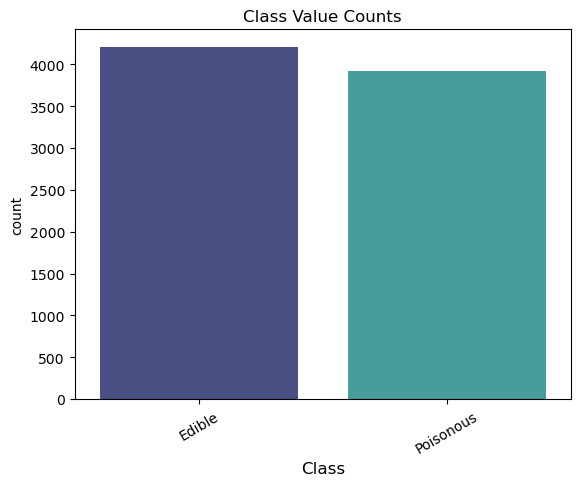

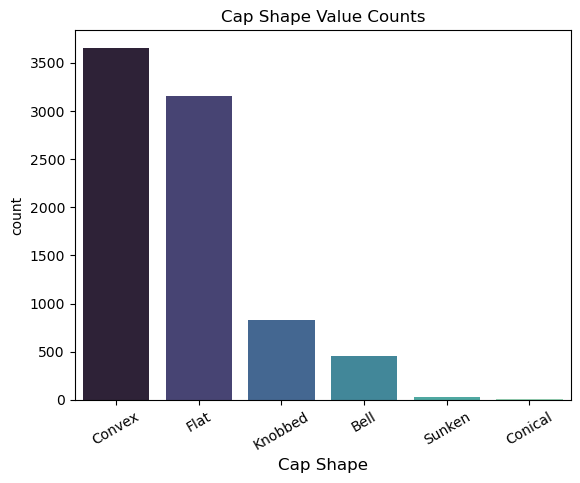

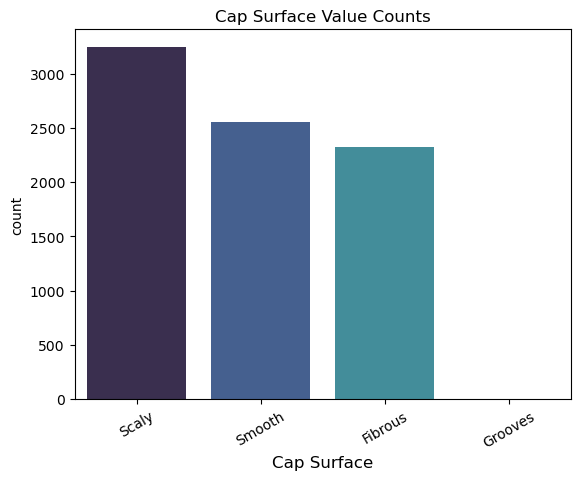

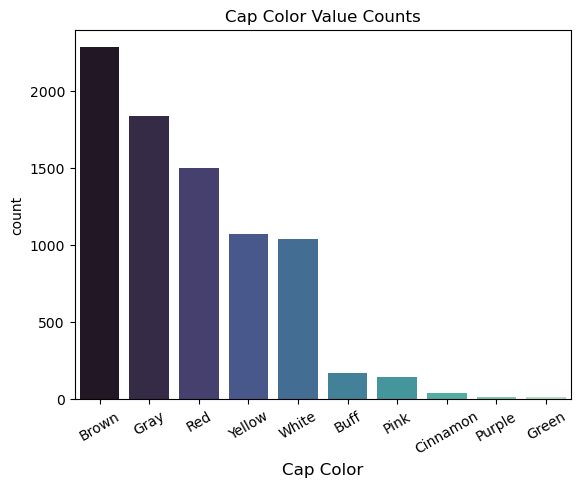

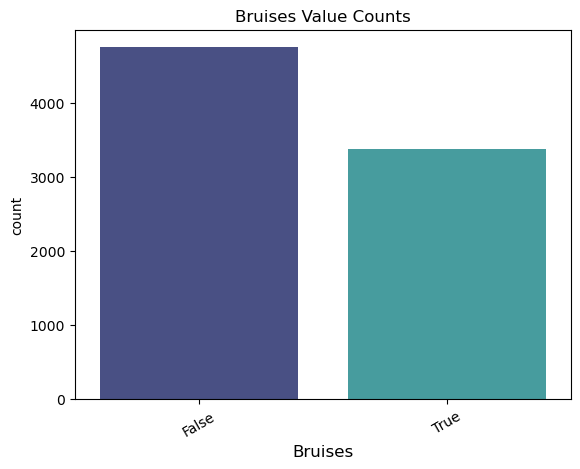

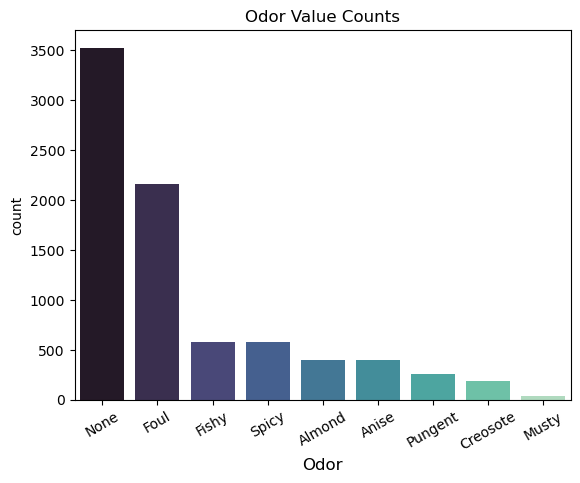

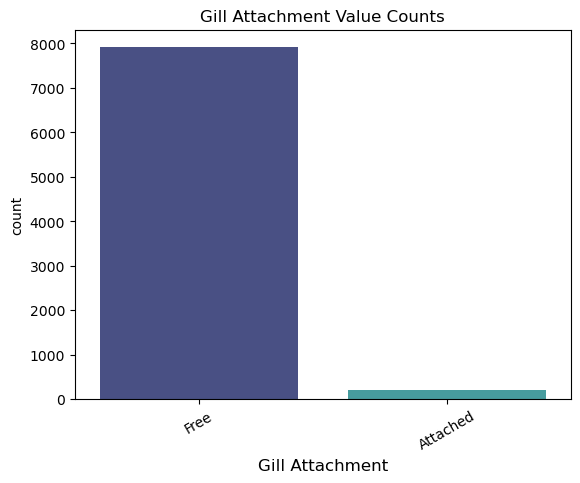

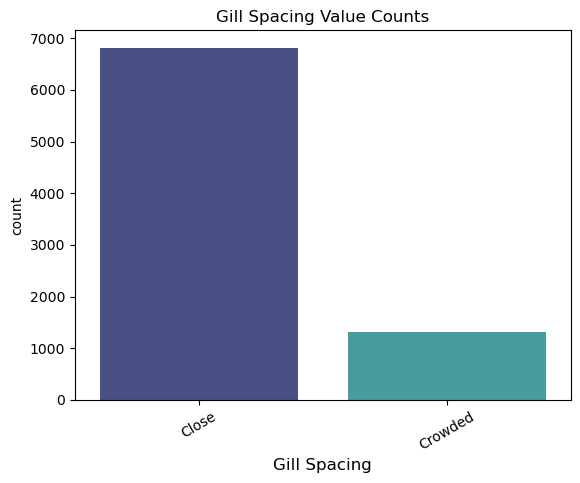

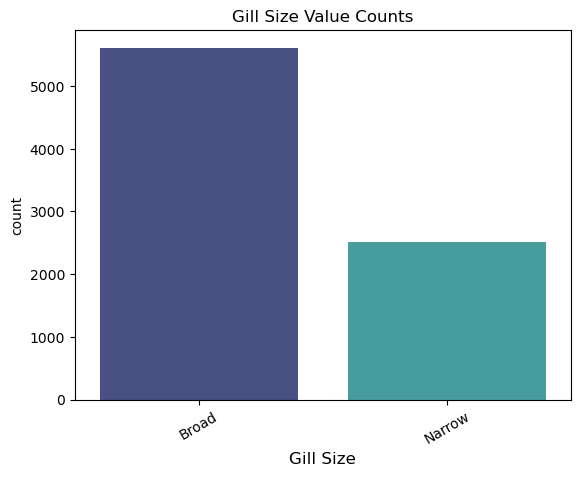

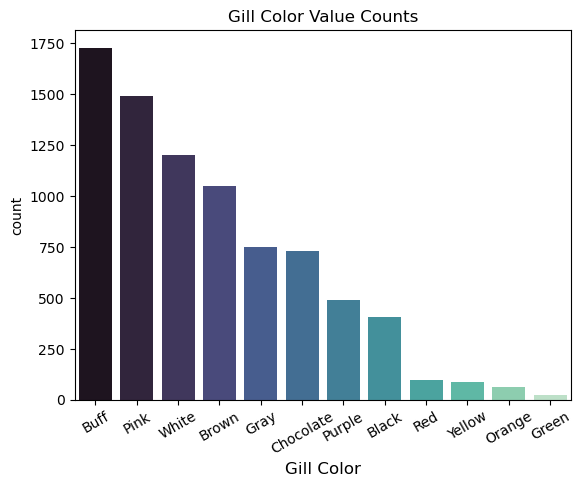

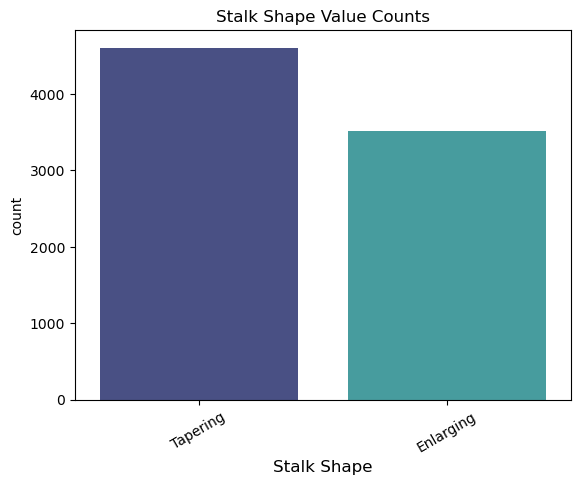

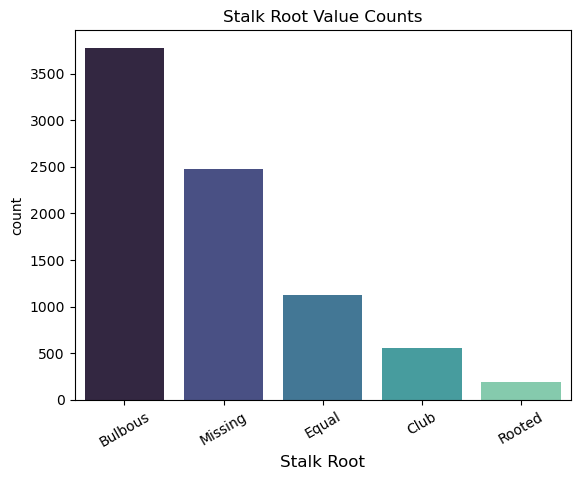

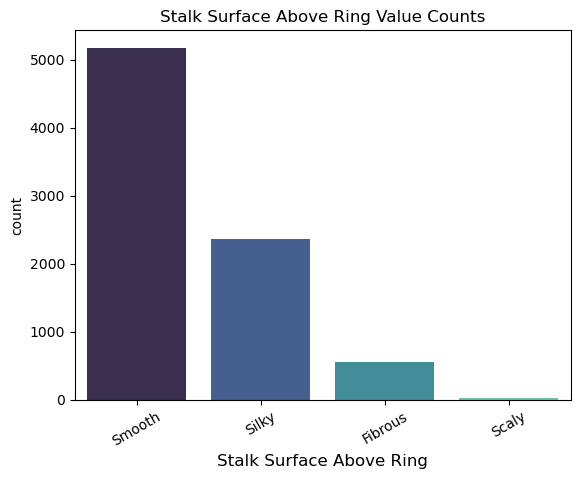

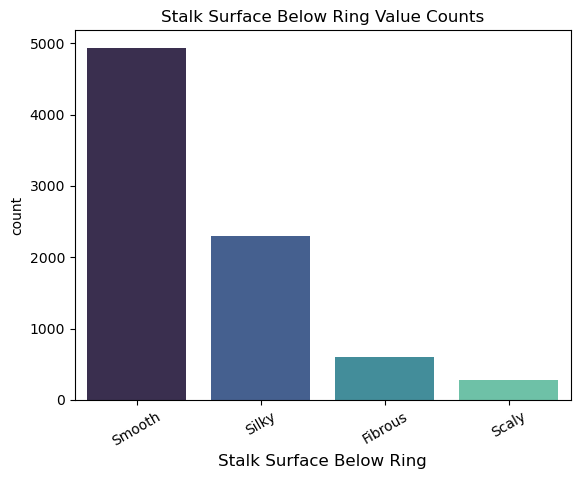

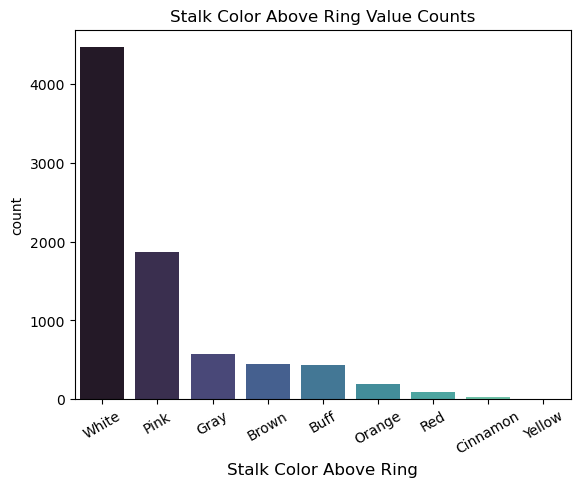

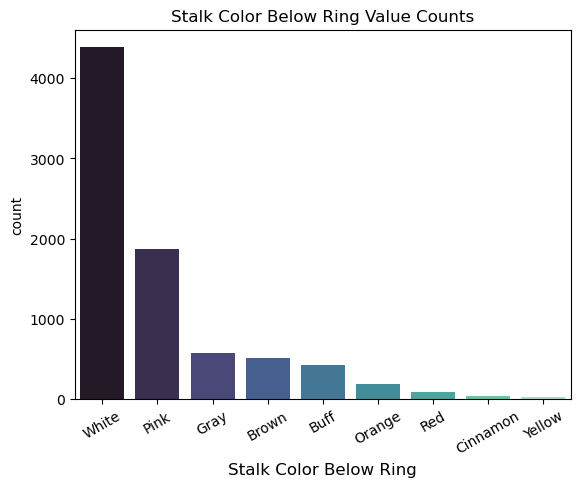

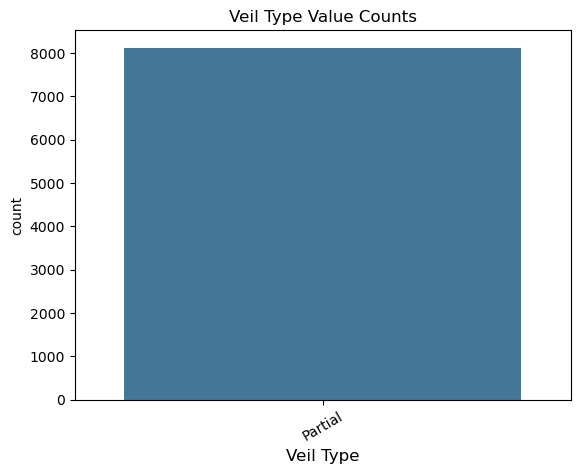

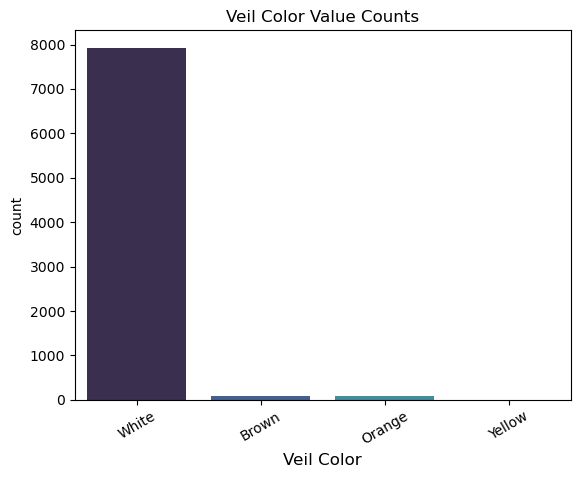

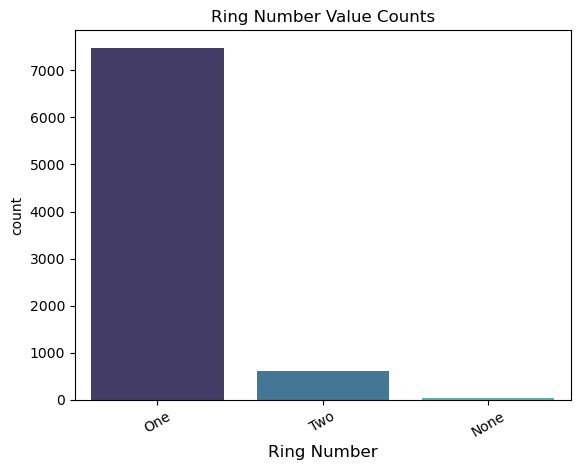

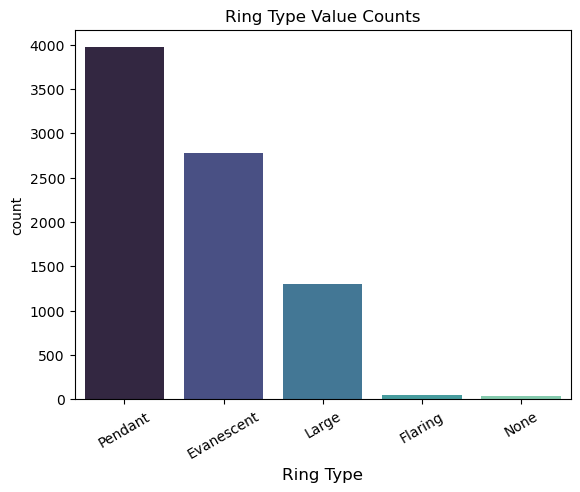

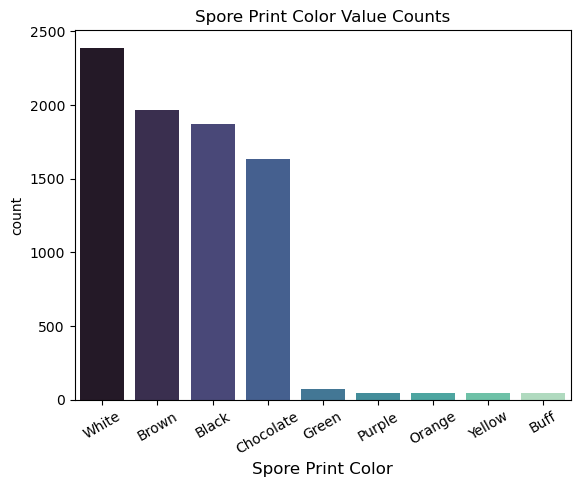

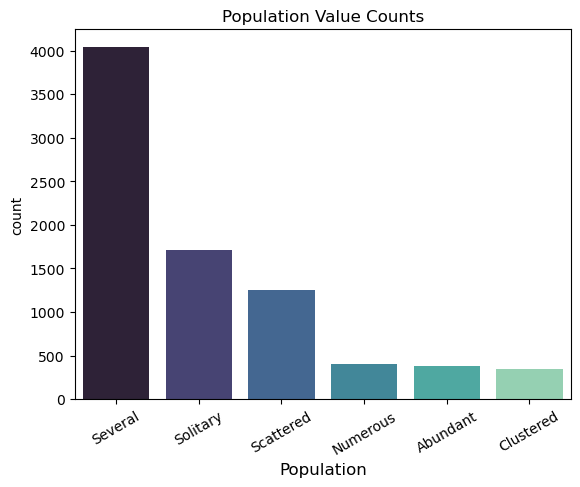

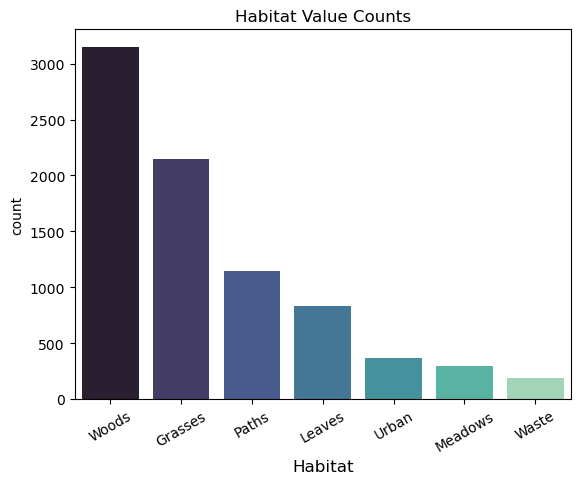

<Figure size 640x480 with 0 Axes>

In [9]:
for column in columns:
    sns.countplot(x = df[column], data=df, palette = "mako", order=df[column].value_counts().index)
    plt.xticks(rotation=30, fontsize=10)
    plt.xlabel(column, fontsize=12)
    plt.title(column + " Value Counts")
    plt.show()
    plt.clf()
    plt.tight_layout()

## Preparation for machine learning

<Axes: xlabel='Class', ylabel='Count'>

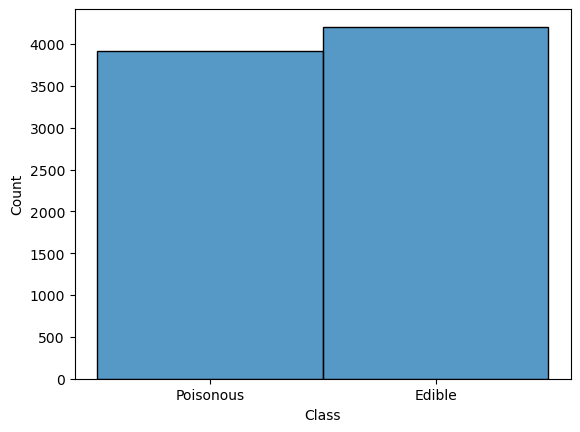

In [10]:
sns.histplot(df['Class'])

Based on the class value counts plot we can assume that our dataset is balanced. Lets move to classification algorythms. But firstly, we need to convert all the unique values to integers. Thus we perform label encoding on the data.

Separating features and target value:

In [11]:
X = df.drop(['Class'],axis=1)
y = df['Class']

Lets encode <b>X</b> by using pandas dummy variable and <b>y</b> using LabelEncoder.

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 0, 0, ..., 0, 1, 0])

p(poisonous) = 1, e(edible) = 0

In [13]:
X = pd.get_dummies(X)
X.head()

,Cap Shape_Bell,Cap Shape_Conical,Cap Shape_Convex,Cap Shape_Flat,Cap Shape_Knobbed,Cap Shape_Sunken,Cap Surface_Fibrous,Cap Surface_Grooves,Cap Surface_Scaly,Cap Surface_Smooth,...,Population_Scattered,Population_Several,Population_Solitary,Habitat_Grasses,Habitat_Leaves,Habitat_Meadows,Habitat_Paths,Habitat_Urban,Habitat_Waste,Habitat_Woods
0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


## Decision Tree

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

Splitting our data into testing and training sets:

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Declaring and fitting our model to data:

In [16]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

### Results and evaluation

In [17]:
print("Decision Tree")
print("Accuracy:", "%.4f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.4f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.4f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.4f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [18]:
print('Training set score: {:.4f}'.format(dt.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(dt.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [19]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



#### Confusion matrix

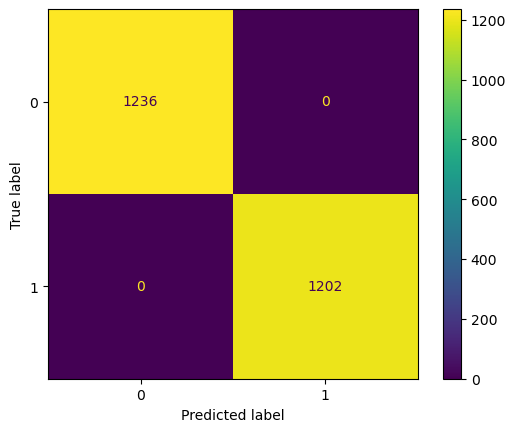

In [20]:
cm = metrics.confusion_matrix(y_test, dt_pred, labels = dt.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
disp.plot()

#### Plotting out decision tree model

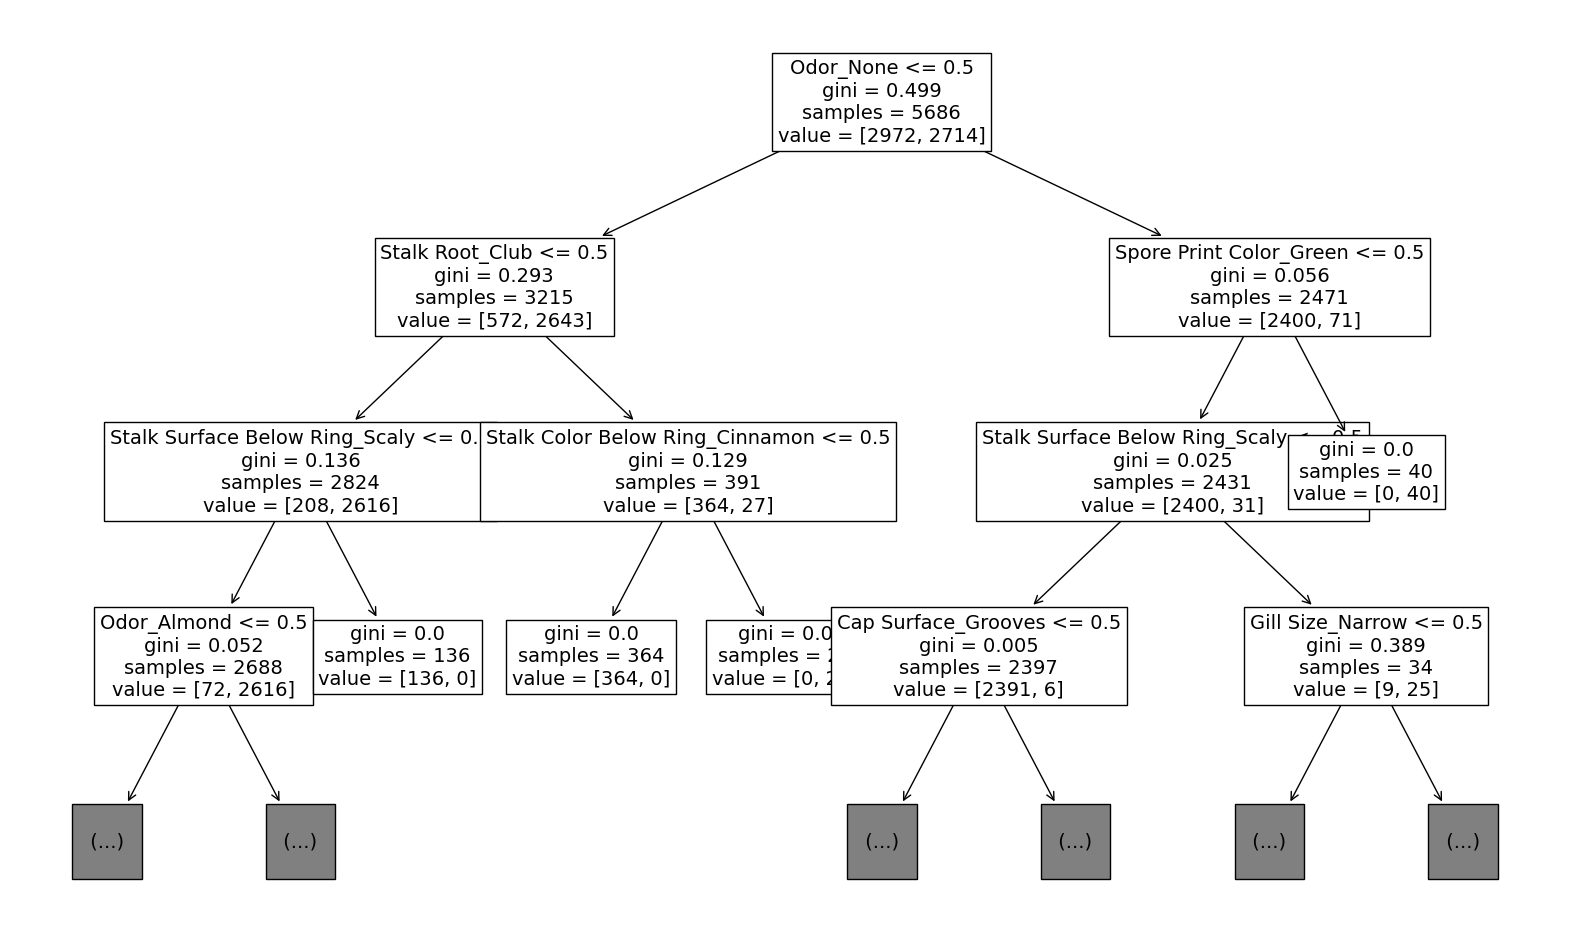

In [21]:
plt.figure(figsize=(20,12))
plot_tree(dt, max_depth=3, fontsize=14, feature_names=X.columns);

#### Feature importance plot

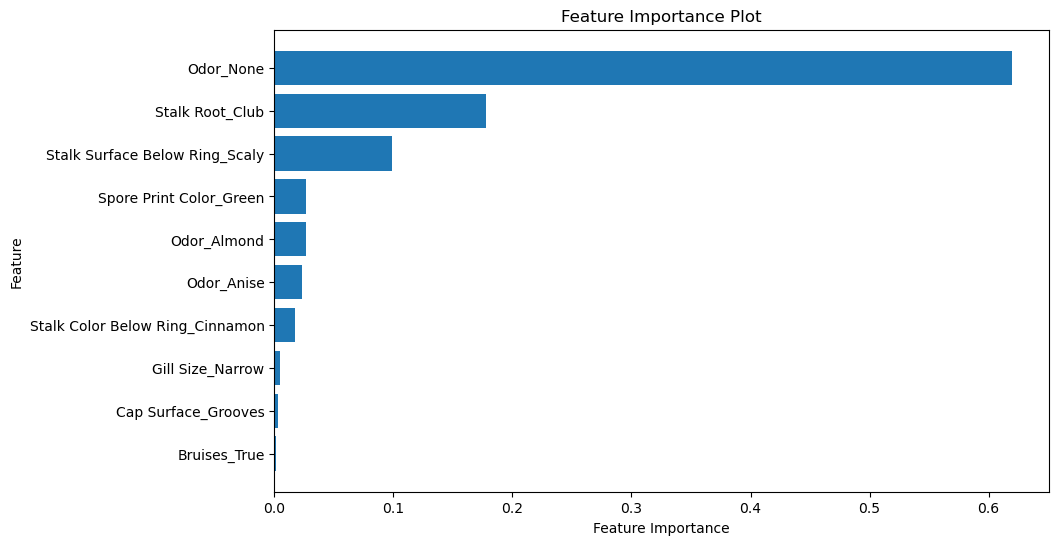

In [22]:
importances = dt.feature_importances_
feature_names = X.columns
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
importances_df = importances_df[importances_df['Importance'] > 0]
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()
plt.show()